In [3]:
import numpy as np
import matplotlib as plt
from sklearn.datasets import load_diabetes

In [7]:
np.random.randn(100) #정규분포를 따르는 난수 100개

array([-0.11647259, -2.19343966, -1.34873241,  0.56863359, -1.06472858,
       -1.9129193 ,  0.26149217, -0.85698497, -0.36492841,  0.25682643,
       -0.15860421,  0.00407983,  0.83679665, -0.89042118, -0.88333244,
        1.18177984,  0.03133952, -1.17474206, -2.19034264,  0.49741229,
        2.12213419,  0.66402148, -2.01171083, -0.92198855,  0.25628927,
       -0.10174066,  0.51906379,  0.25470521,  0.9526789 ,  1.64440932,
        0.32965387, -0.86237962, -0.31883081, -0.13271261, -0.72597487,
        0.13028932, -0.11034624, -0.19321746,  0.95185146,  1.11757101,
       -0.1953981 ,  0.06449861, -1.55321428,  0.77190214,  0.47906639,
       -0.56392802, -1.4919701 ,  1.15569213,  0.57871874,  0.51938325,
       -0.20490432, -2.1776925 , -0.57831038, -1.4094995 , -1.0178061 ,
       -1.6973559 , -0.96090362, -0.95432864,  0.81683287,  0.43881656,
        0.17242129,  0.43333988,  0.20721179, -1.21194384,  1.88344809,
       -0.16906091,  0.37689083, -0.46691463,  0.53968287, -1.12

# 3장

## 선형회귀

In [4]:
diabetes=load_diabetes()

In [7]:
diabetes.data.shape
diabetes.target.shape

(442,)

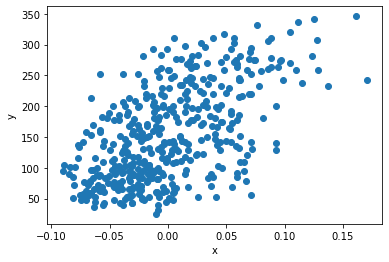

In [5]:
#2차원 시각화
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2],diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
x=diabetes.data[:,2]
y=diabetes.target

# 경사하강법

선형회귀

y = ax+b
y^= wx+b (w: 가중치, 계수)

1) 무작위로 w, b를 정하고 샘플 하나 정해서 y^ 계산
2) 진짜 y와 비교하여  w, b 조정
3) 모든 샘플 처리할 때까지 반복

In [14]:
w,b=(1.0,1.0) #로 가정
y_hat = x[0]*w+b
y_hat #예측 값

1.0616962065186886

In [13]:
y[0] #실제 값과 차이 많이 남

151.0

In [15]:
#w를 0.1만큼 증가시켜보자
w_inc=w+0.1
y_hat_inc=x[0]*w_inc+b
y_hat_inc #실제값과 조금 더 가까워짐

1.0678658271705574

In [16]:
#변화율은?
w_rate=(y_hat_inc-y_hat)/ (w_inc-w)
w_rate #=x[0]

0.061696206518688734

In [17]:
w_new= w+w_rate

0.0616962065186885

In [20]:
#절편 업데이트
b_inc=b+0.1
y_hat_inc=x[0]*w_inc+b_inc
b_rate=(y_hat_inc-y_hat)/ (b_inc-b)

b_new=b+b_rate

# *y_hat<y 일 경우
# 반대일 경우 w,b 를 감소시켜야

In [21]:
##오차
err=y[0]-y_hat
w_new=w+w_rate*err
b_new=b+1*err
print(w_new,b_new)

10.250624555904514 150.9383037934813


In [ ]:
#두번쨰 샘플
y_hat=x[1]*w_new+b_new
err=y[1]-y_hat
w_rate=x[1]
w_new=w_new+w_rate*err
b_new=b_new+1*err

In [22]:
#확장
for x_i, y_i in zip(x,y):
    y_hat=x_i*w+b
    err=y_i-y_hat
    w_rate=x_i
    w=w+w_rate*err
    b=b+1*err
print(w,b)

587.8654539985689 99.40935564531424


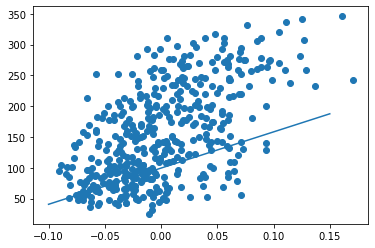

In [24]:
plt.scatter(x,y)
pt1=(-0.1,-0.1*w+b)
pt2=(0.15,0.15*w+b)

plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.show()

In [26]:
#확장
for i in range(1,100):
    for x_i, y_i in zip(x,y):
        y_hat=x_i*w+b
        err=y_i-y_hat
        w_rate=x_i
        w=w+w_rate*err
        b=b+1*err
print(w,b)

#913.5x+123.4 회귀 모델

913.5973364345905 123.39414383177204


In [27]:
#예측
x_new=0.18
y_pred=x_new*w+b
y_pred

287.8416643899983

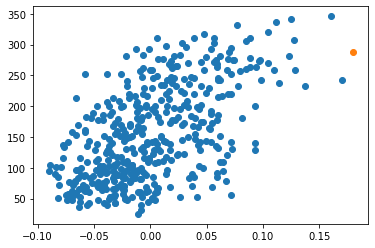

In [28]:
plt.scatter(x,y)
plt.scatter(x_new,y_pred)
plt.show()

# 손실함수

squared error : (y-y*)^
제곱오차의 기울기가 0이 되는 지점이 최적
미분시 -(y-y*)x :(그레디언트)

w-SE'=w+(y-y*)x
b=b+(y-y*)

In [43]:
class Neuron:
    def __init__(self): #초기화
        self.w=1.0
        self.b=1.0
    
    def forpass(self,x): #정방향 계산
        y_hat=x*self.w+self.b
        return y_hat
    
    def backprop(self, x, err): #역방향 계산
        w_grad=x*err #가중치 업데이트 -(y-y*)x
        b_grad=1*err #절편  업데이트 -(y-y*)
        return w_grad, b_grad

    def fit(self,x,y,epochs=100):     #훈련을 위한 메서드
        for i in range(epochs):          #에포크 반복
            for x_i, y_i in zip(x,y):     #샘플 반복
                y_hat = self.forpass(x_i) #정방향 계산
                err= -(y_i - y_hat)          #오차계산
                w_grad, b_grad=self.backprop(x_i,err)#역방향 계산
                self.w-=w_grad            #가중치 업데이트
                self.b-=b_grad            #절편 업데이트

In [44]:
neuron=Neuron()
neuron.fit(x,y)

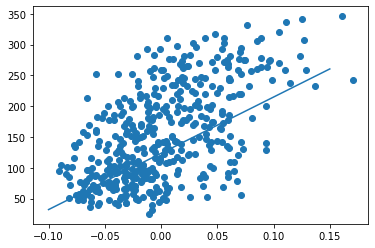

In [46]:
plt.scatter(x,y)
pt1=(-0.1,-0.1*neuron.w+neuron.b)
pt2=(0.15,0.15*neuron.w+neuron.b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.show()

(3, 3)